In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import the test_train_rsme data
import pandas as pd
data = pd.read_csv('../../logs/normalization_fix/new/train_test_rmse.csv', header=0)

In [3]:
data.describe()

,num_processes,num_iterations,max_iterations,batch_size,learning_rate,train_rmse,test_rmse,train_time_max,train_time_avg,test_time_max,test_time_avg,total_time_max,total_time_avg
count,150.000000,150.000000,150.0,150.00000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,3.000000,30011.493333,1000000.0,168.00000,0.00001,0.784885,0.783937,67.907440,67.907147,15.804266,15.803814,83.712124,83.711798
std,1.418951,35331.316475,0.0,173.83167,0.00000,0.198448,0.198059,102.474614,102.474496,5.755039,5.755370,102.391424,102.391358
min,1.000000,126.000000,1000000.0,16.00000,0.00001,0.449943,0.449951,13.581956,13.581956,2.868904,2.868319,24.423391,24.423222
25%,2.000000,8635.000000,1000000.0,32.00000,0.00001,0.636456,0.636591,32.011147,32.010503,11.482268,11.482265,47.831838,47.831705
50%,3.000000,17648.500000,1000000.0,96.00000,0.00001,0.747746,0.746786,45.093373,45.093361,16.030707,16.030637,62.867326,62.867288
75%,4.000000,37961.750000,1000000.0,256.00000,0.00001,0.867627,0.867612,64.195206,64.195078,20.271919,20.271493,75.908457,75.908396
max,5.000000,255313.000000,1000000.0,512.00000,0.00001,1.470920,1.472195,859.754338,859.753764,29.646356,29.646356,870.690397,870.689719


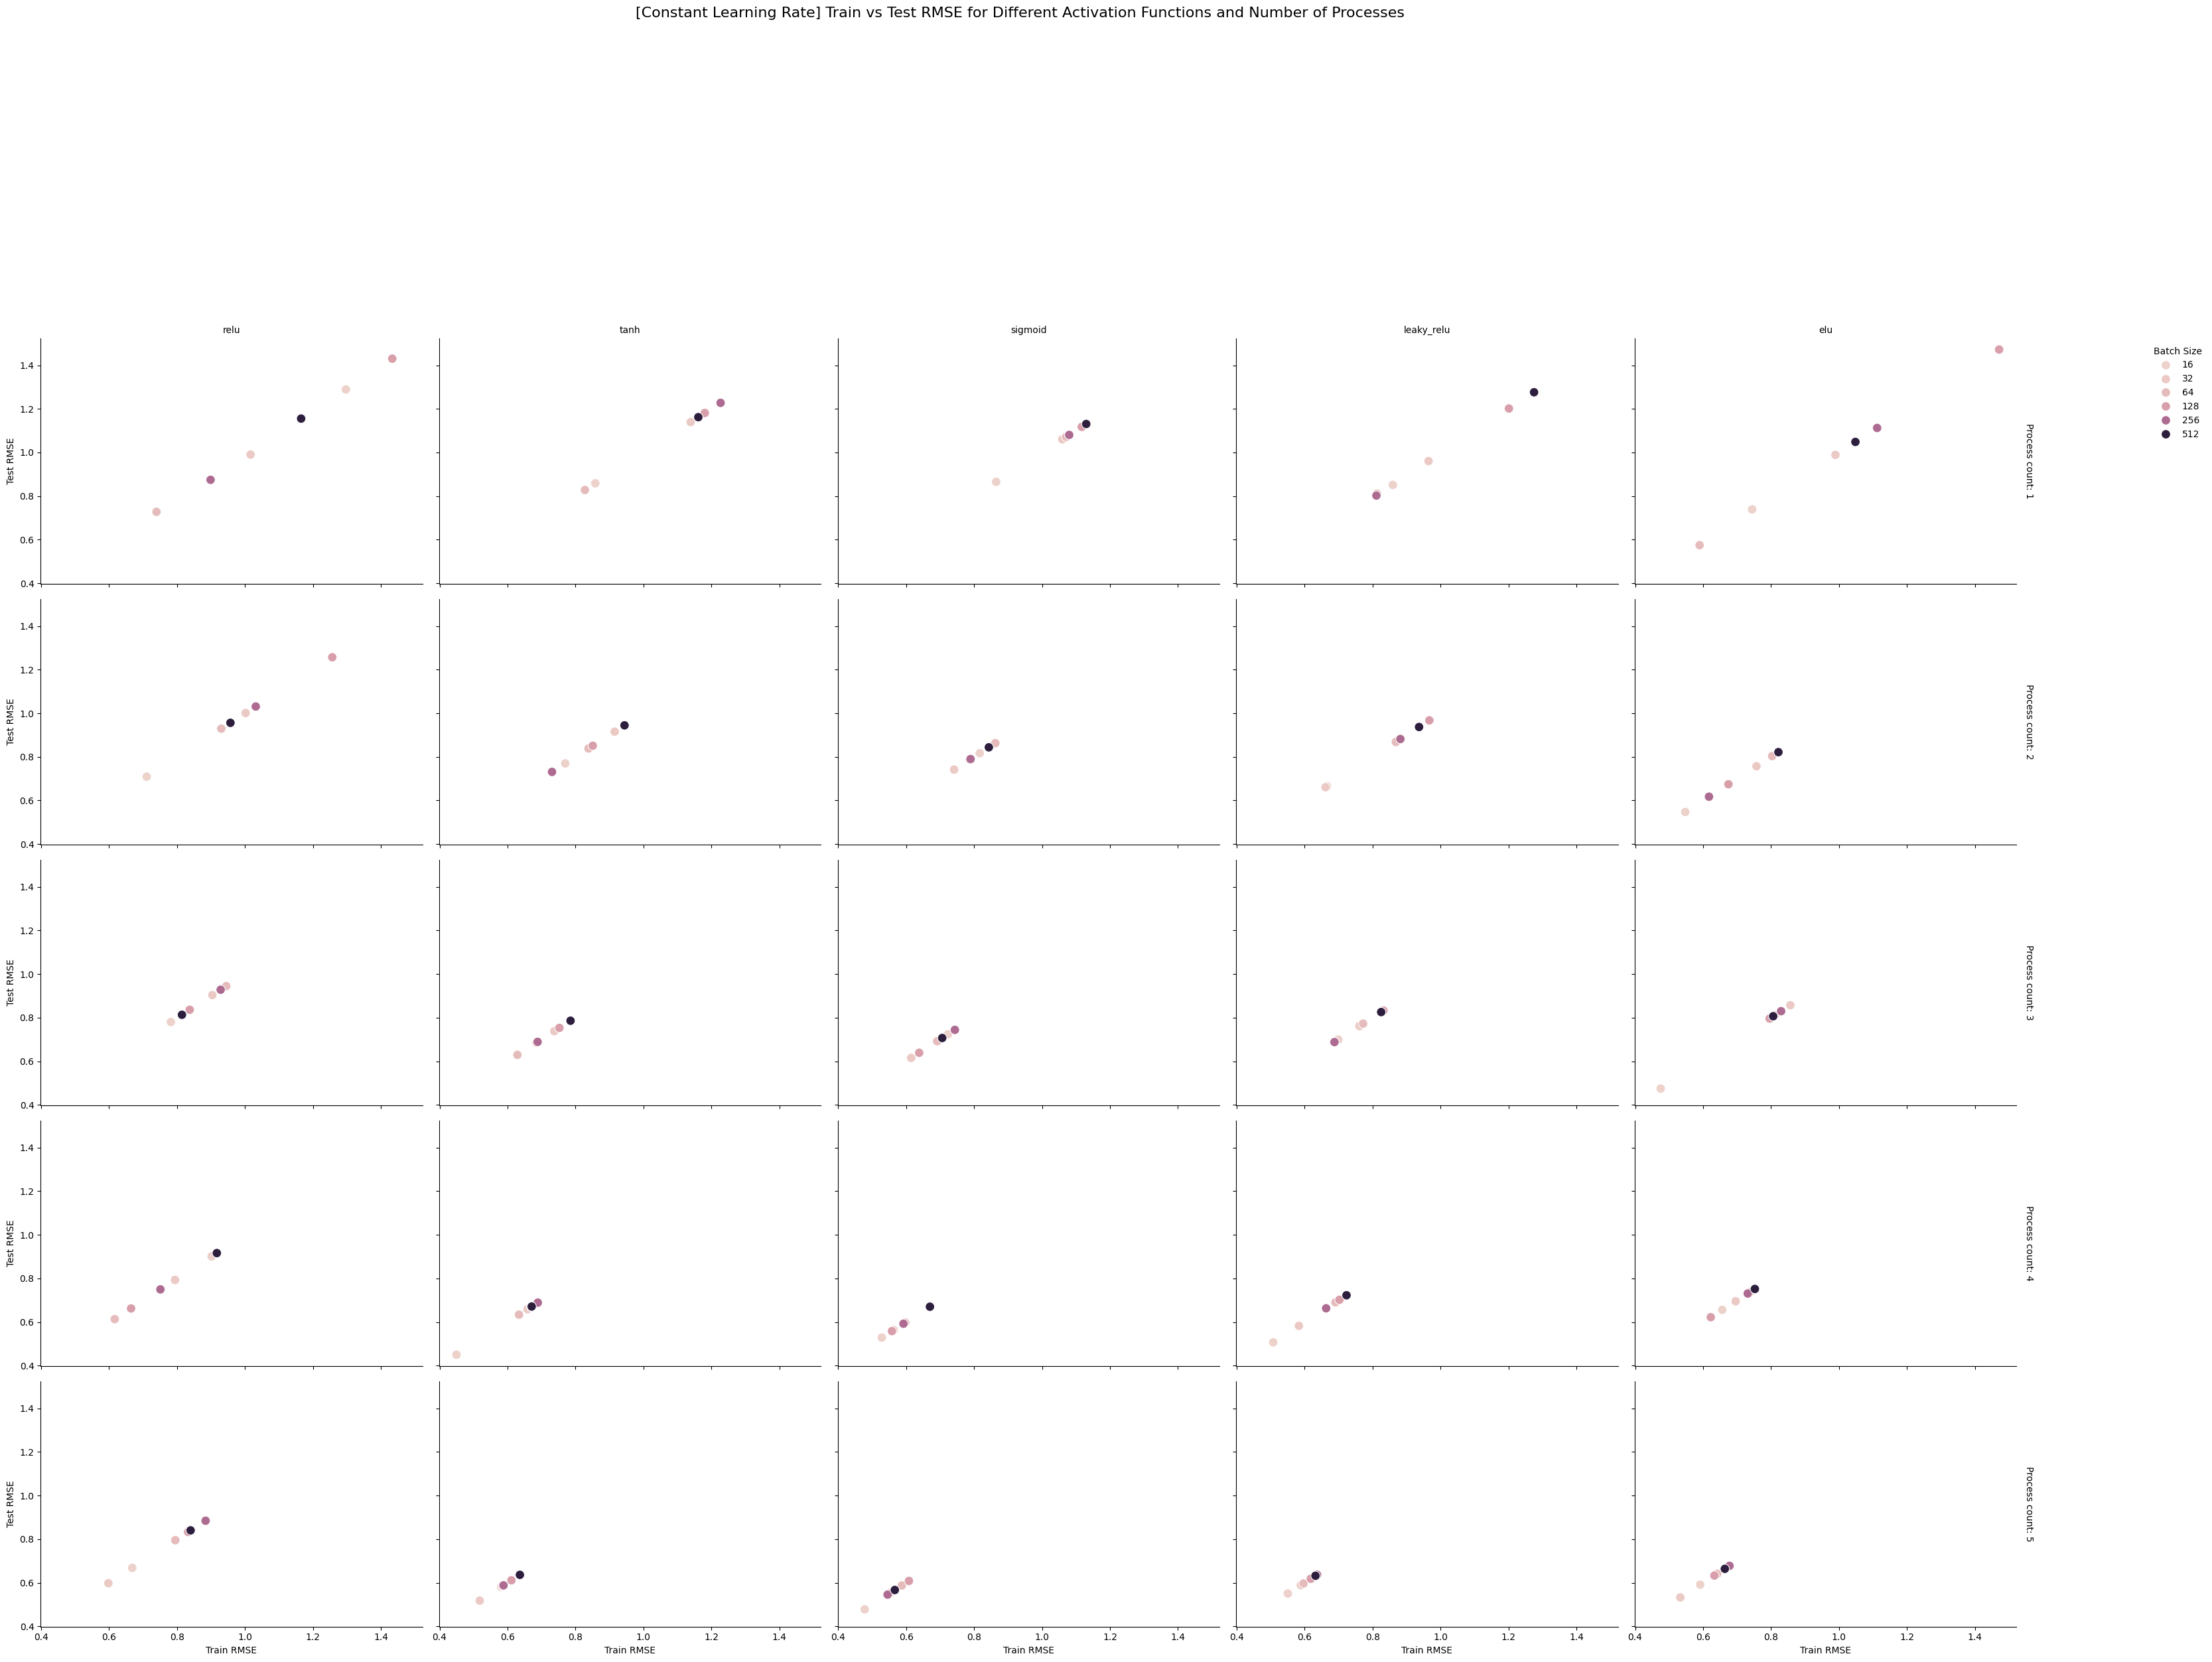

In [4]:
# plot test vs train rmse for different models

import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, col='activation', row='num_processes', margin_titles=True, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='train_rmse', y='test_rmse', hue='batch_size', s=100)
g.set_axis_labels("Train RMSE", "Test RMSE")
g.set_titles(col_template="{col_name}", row_template="Process count: {row_name}")
# all legend outside the plot
g.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Batch Size')
plt.tight_layout()
g.fig.suptitle('[Constant Learning Rate] Train vs Test RMSE for Different Activation Functions and Number of Processes', fontsize=16, y=1.25)
# add a title for the entire plot below the subplots, space the title from the subplots
plt.subplots_adjust(top=1)
plt.savefig('../../logs/normalization_fix/constant_lr/train_test_rmse.png', bbox_inches='tight')
plt.show()

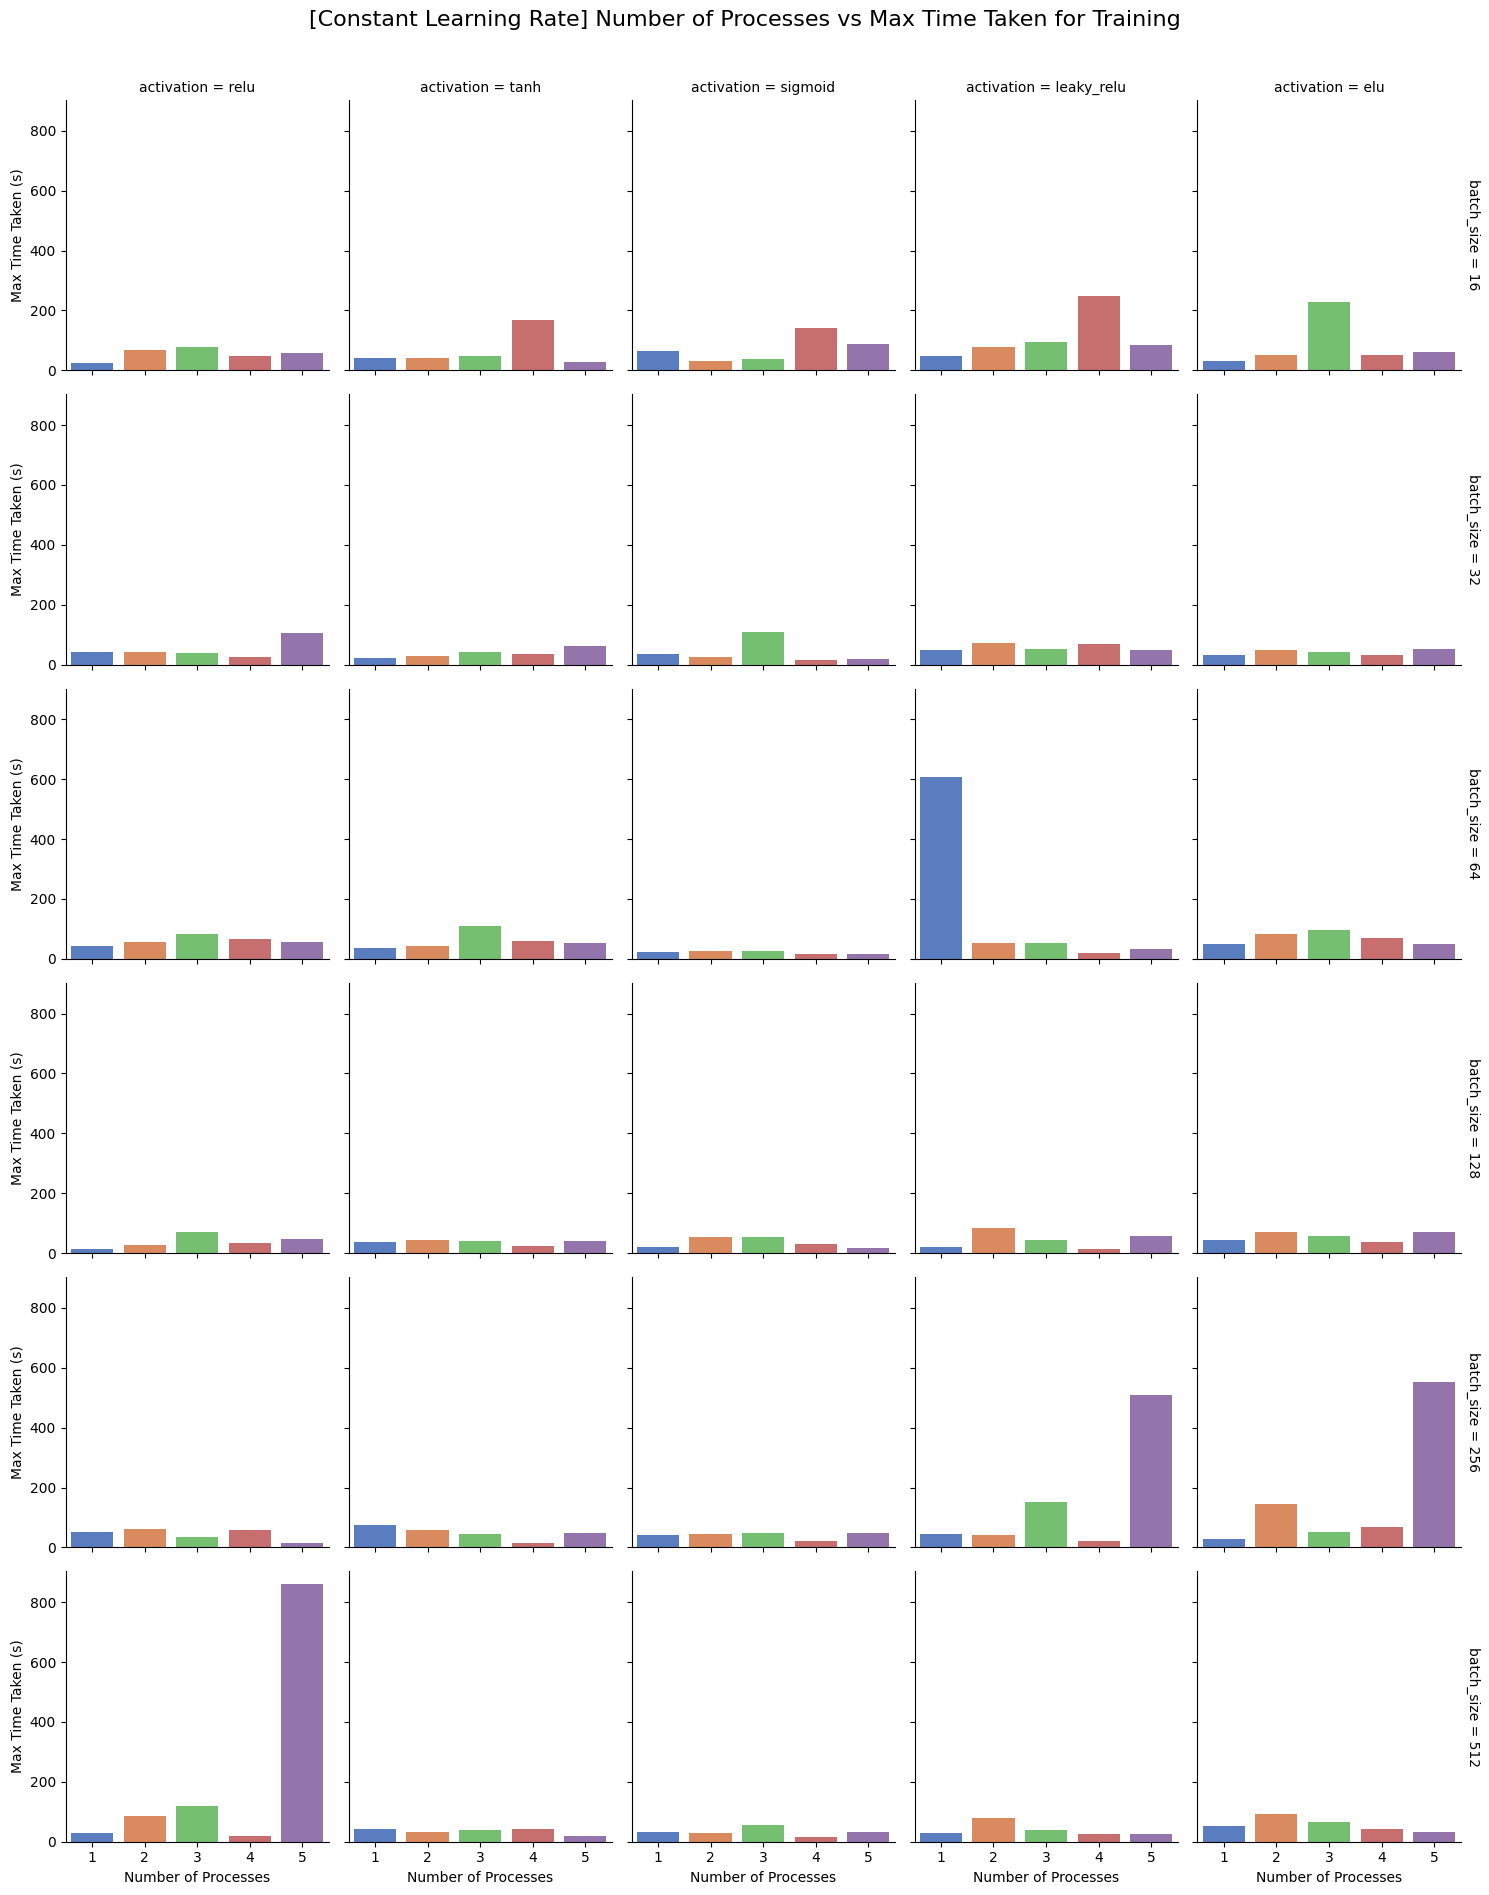

In [5]:
# plot a bar chart between number of processes and max time taken for training
# use grid plot for each activation function by batch size
# use the colors for the bars to be the same as the hues of the scatterplot
# make this a grid with different batch sizes as rows and different activation functions as columns
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, col="activation", row="batch_size", margin_titles=True)
g.map_dataframe(sns.barplot, x='num_processes', y='train_time_max', palette='muted', hue ='num_processes', dodge=False)
g.set_axis_labels("Number of Processes", "Max Time Taken (s)")
plt.tight_layout()
g.fig.suptitle('[Constant Learning Rate] Number of Processes vs Max Time Taken for Training', fontsize=16, y=1.05)
# add a title for the entire plot below the subplots, space the title from the subplots
plt.subplots_adjust(top=1)
plt.savefig('../../logs/normalization_fix/constant_lr/process_train_time_max.png', bbox_inches='tight')

plt.show()

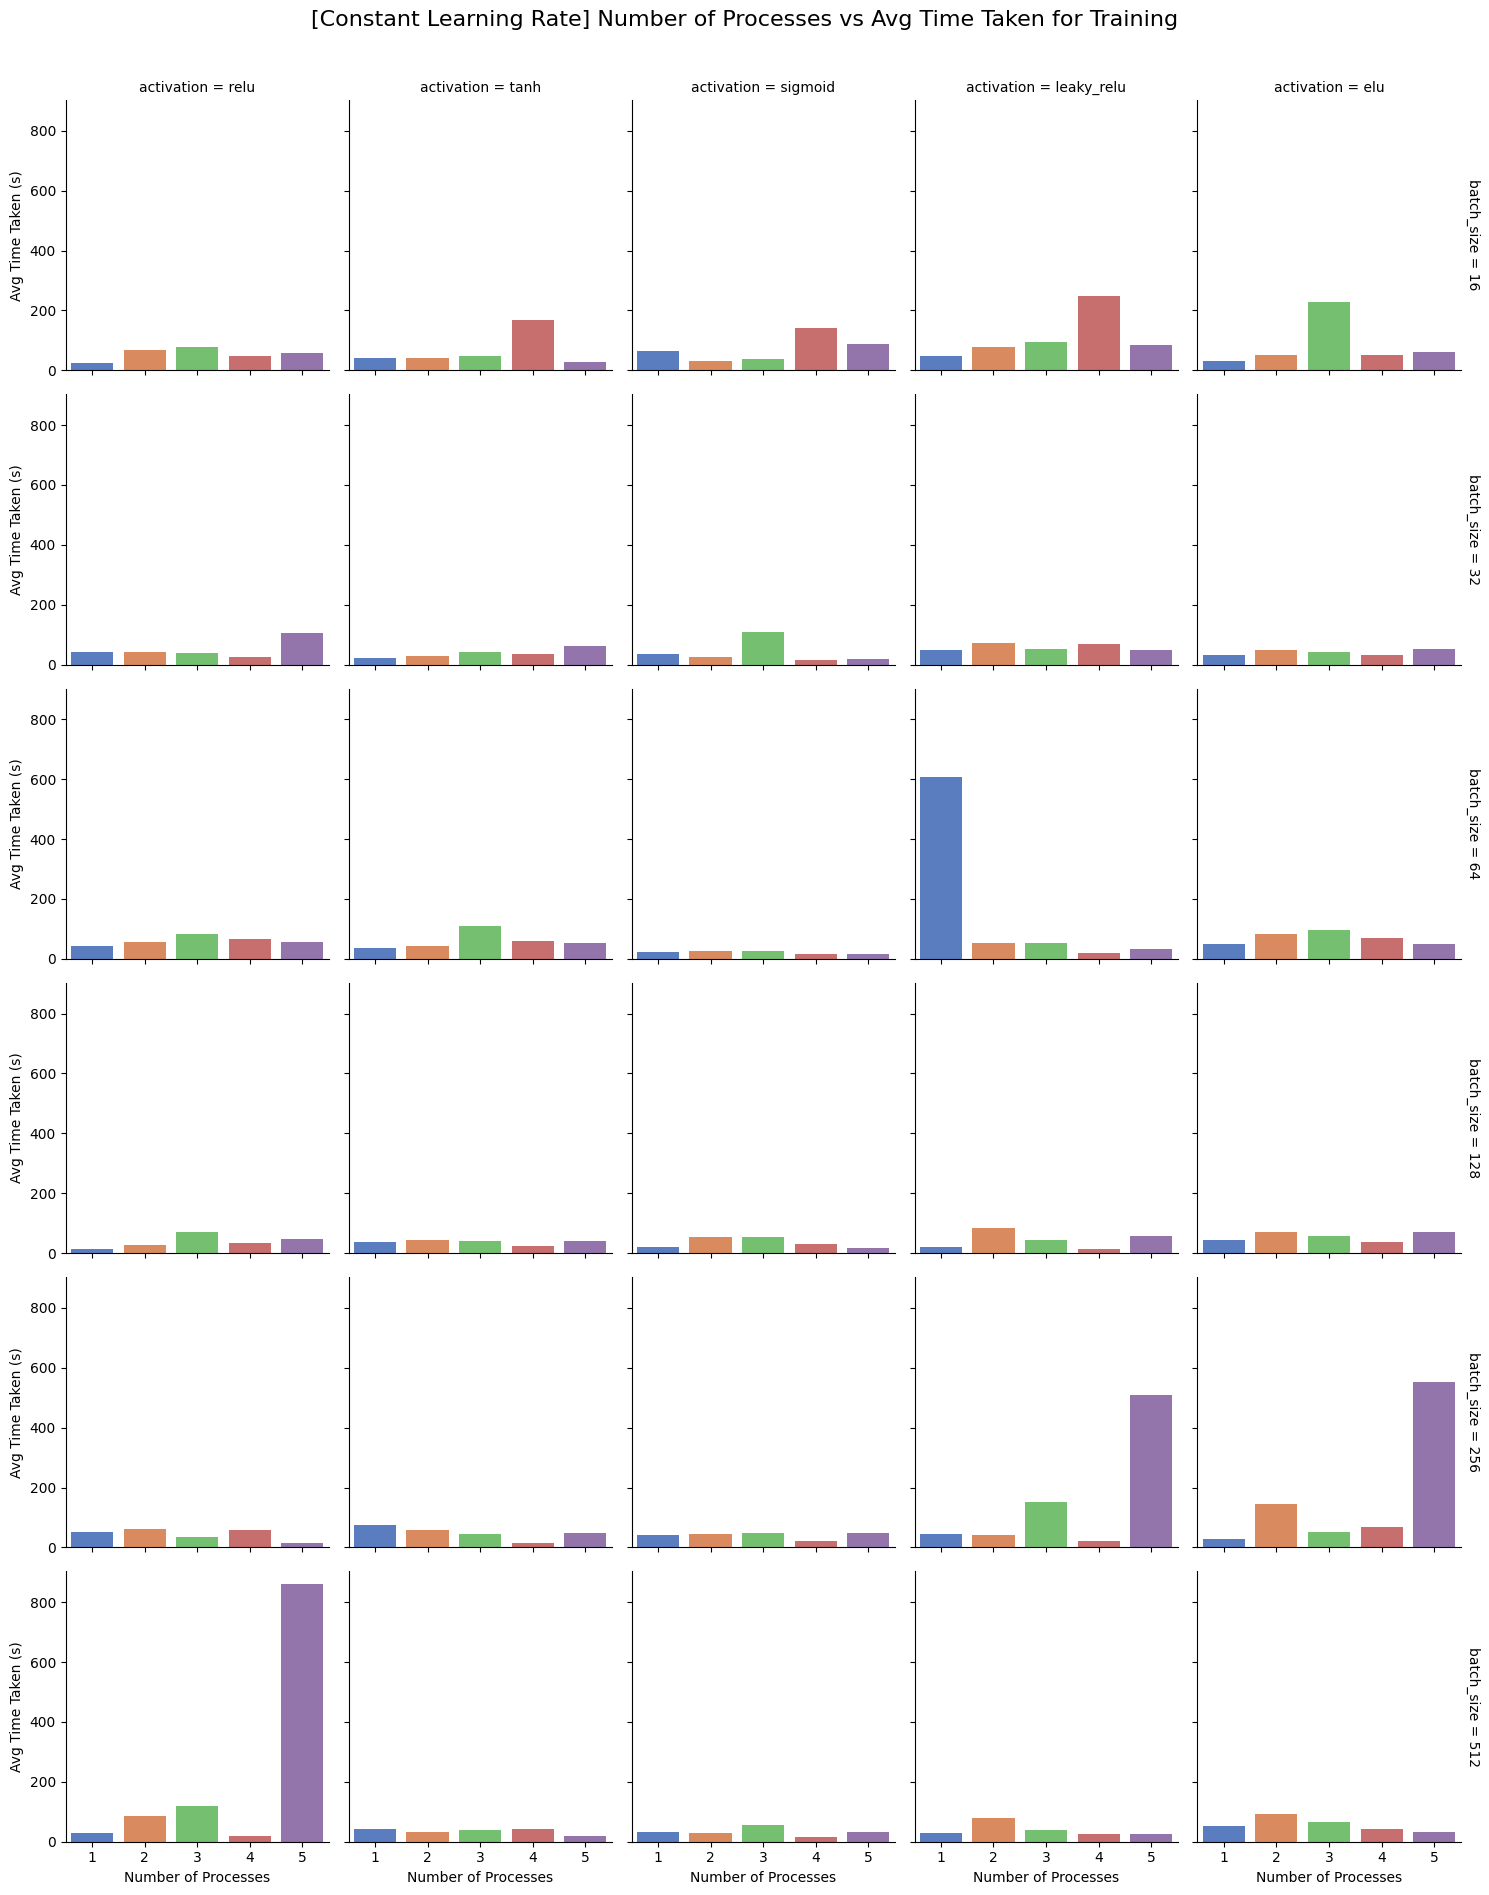

In [6]:
# plot a bar chart between number of processes and avg time taken for training
# use grid plot for each activation function by batch size
# use the colors for the bars to be the same as the hues of the scatterplot
# make this a grid with different batch sizes as rows and different activation functions as columns
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, col="activation", row="batch_size", margin_titles=True)
g.map_dataframe(sns.barplot, x='num_processes', y='train_time_avg', palette='muted', hue ='num_processes', dodge=False)
g.set_axis_labels("Number of Processes", "Avg Time Taken (s)")
plt.tight_layout()
g.fig.suptitle('[Constant Learning Rate] Number of Processes vs Avg Time Taken for Training', fontsize=16, y=1.05)
# add a title for the entire plot below the subplots, space the title from the subplots
plt.subplots_adjust(top=1)
plt.savefig('../../logs/normalization_fix/constant_lr/process_train_time_avg.png', bbox_inches='tight')

plt.show()

In [7]:
# import the test_train_rmse data
# TODO update the path to the correct file after the whole local mpi run concludes
import pandas as pd
training_metrics_data = pd.read_csv('../../logs/normalization_fix/new/training_metrics.csv', header=0)
training_metrics_data.head()

,num_processes,iteration,batch_size,activation,learning_rate,training_loss
0,1,0,16,relu,0.00001,4.102639
1,1,1,16,relu,0.00001,2.980134
2,1,2,16,relu,0.00001,0.748109
3,1,3,16,relu,0.00001,0.503873
4,1,4,16,relu,0.00001,1.978110


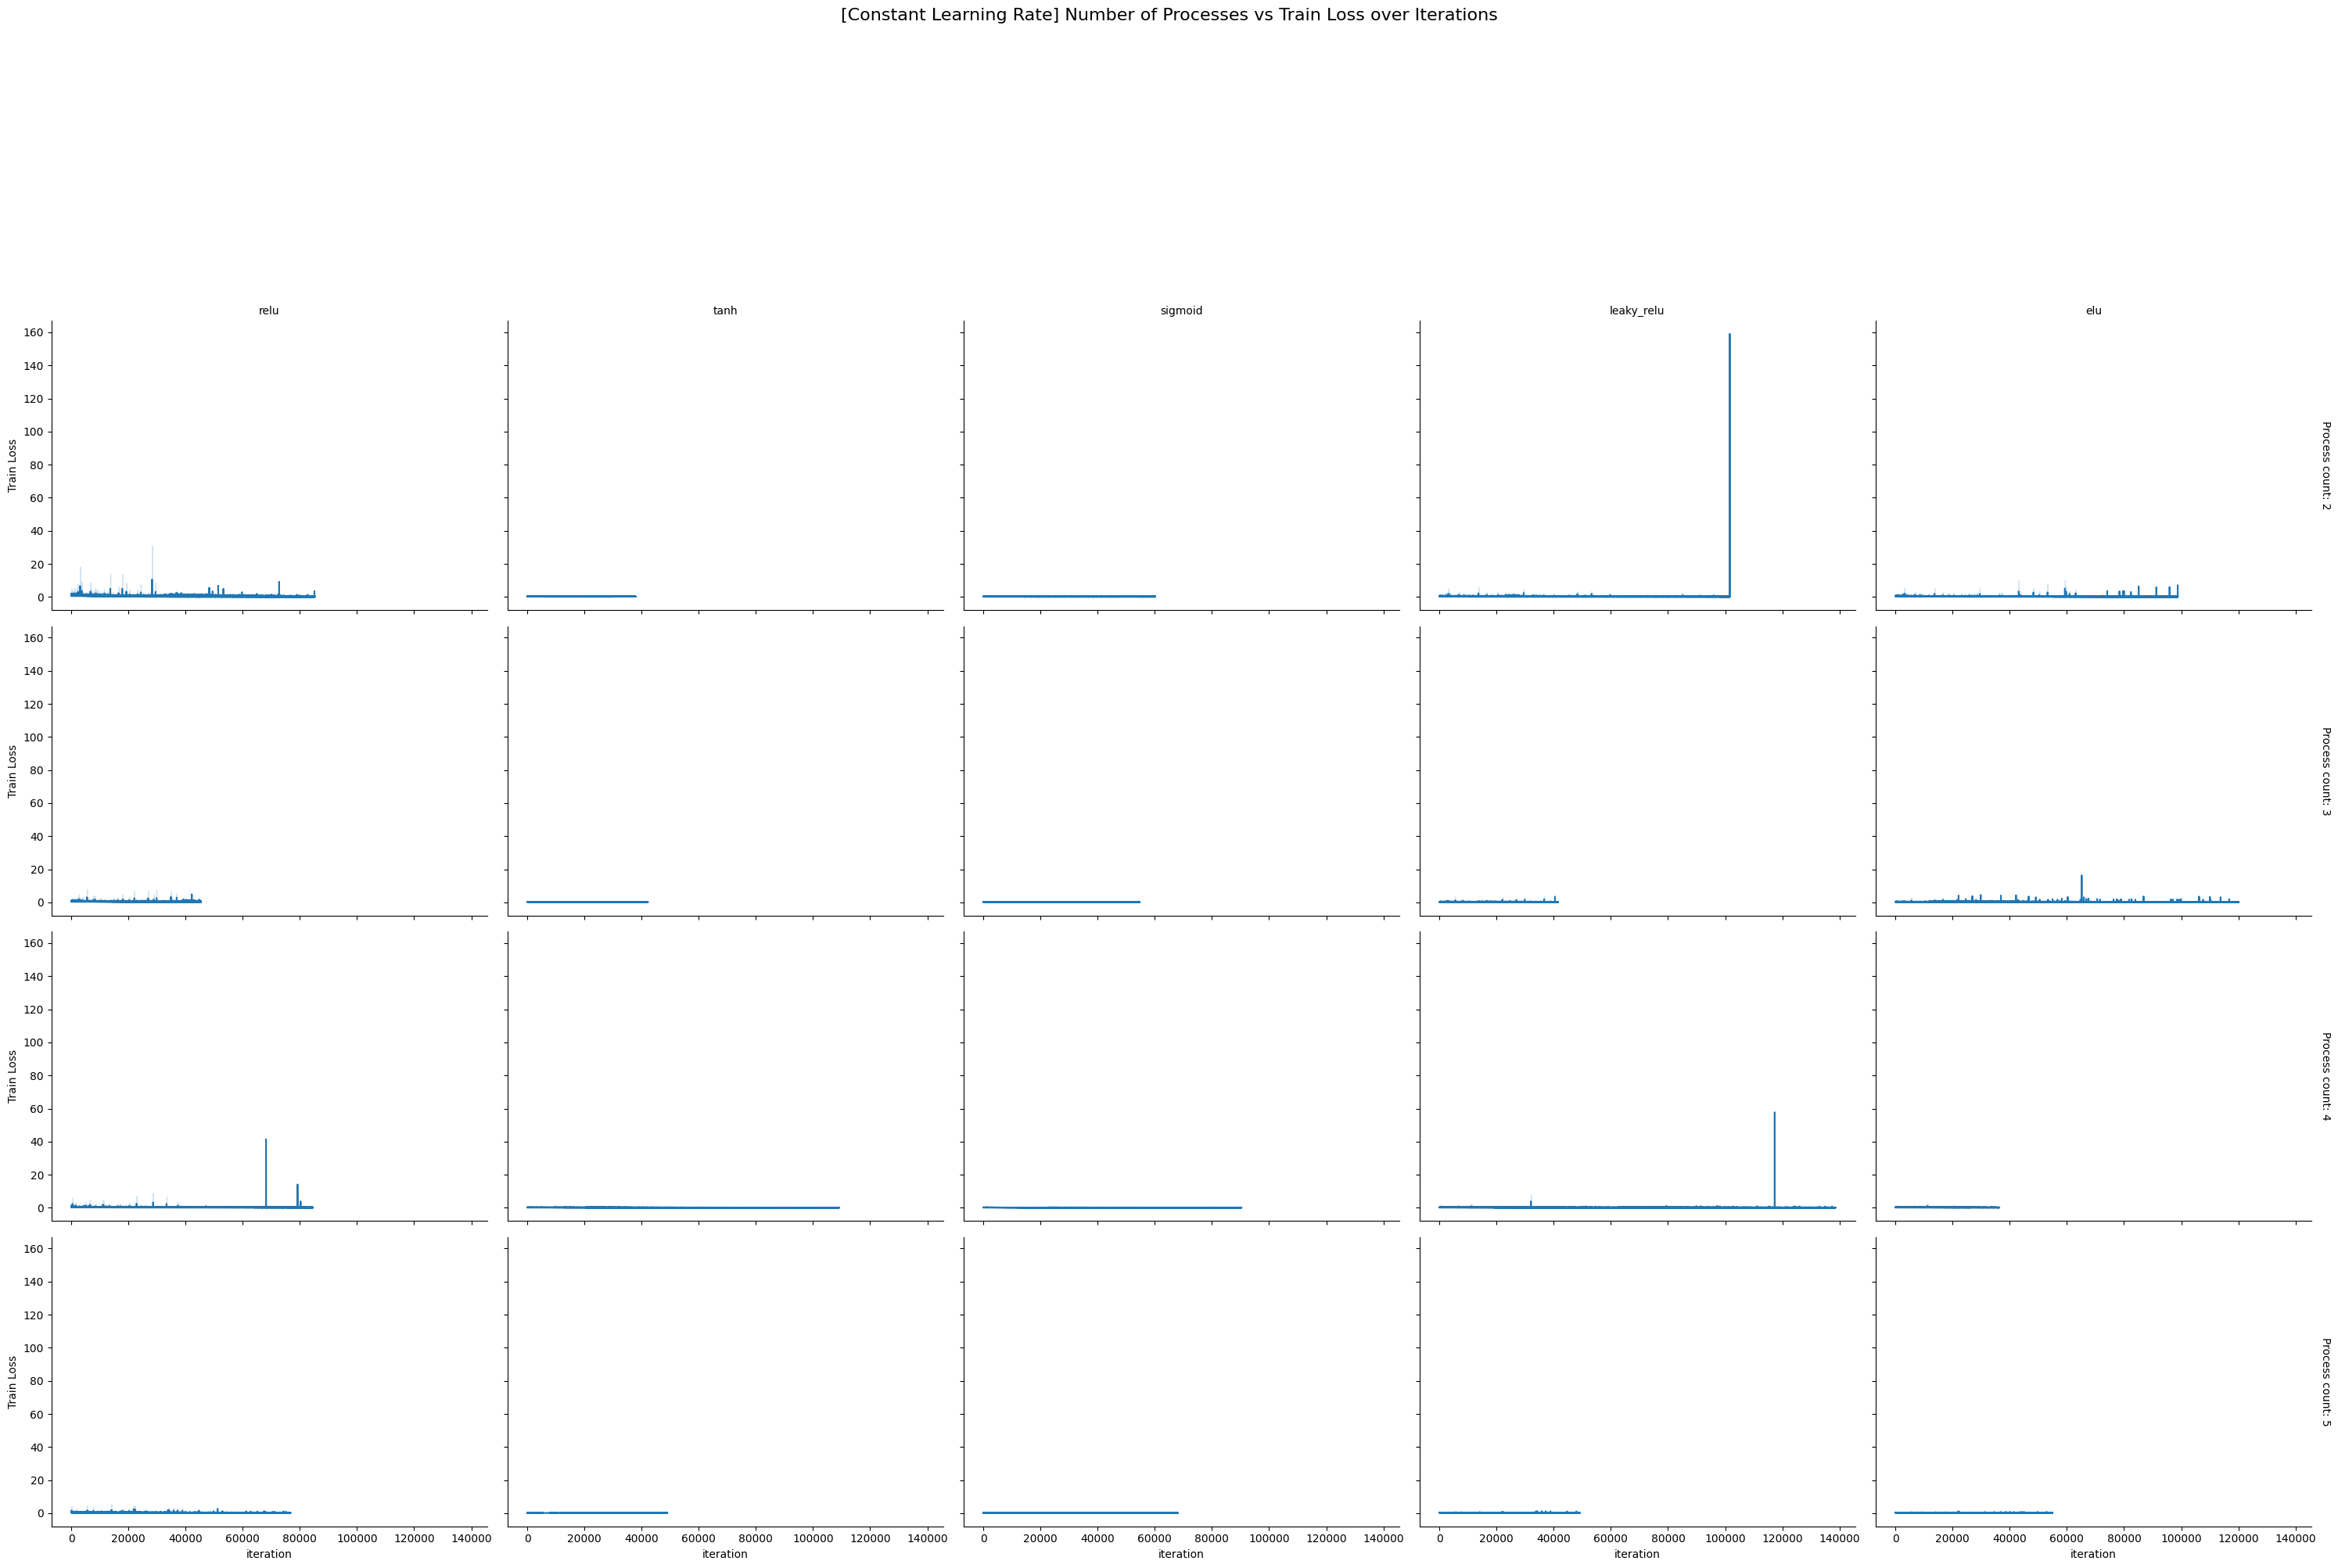

In [14]:
# extend the previous plot to include all activation functions and process counts 
g = sns.FacetGrid(training_metrics_data[training_metrics_data['num_processes'] > 1], col='activation', row='num_processes', margin_titles=True, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x='iteration', y='training_loss')
g.set_axis_labels("iteration", "Train Loss")
g.set_titles(col_template="{col_name}", row_template="Process count: {row_name}")
g.fig.suptitle('[Constant Learning Rate] Number of Processes vs Train Loss over Iterations', fontsize=16, y=1.25)
# add a title for the entire plot below the subplots, space the title from the subplots
plt.subplots_adjust(top=1)
plt.savefig('../../logs/normalization_fix/constant_lr/train_loss_over_iterations.png', bbox_inches='tight')
plt.show()

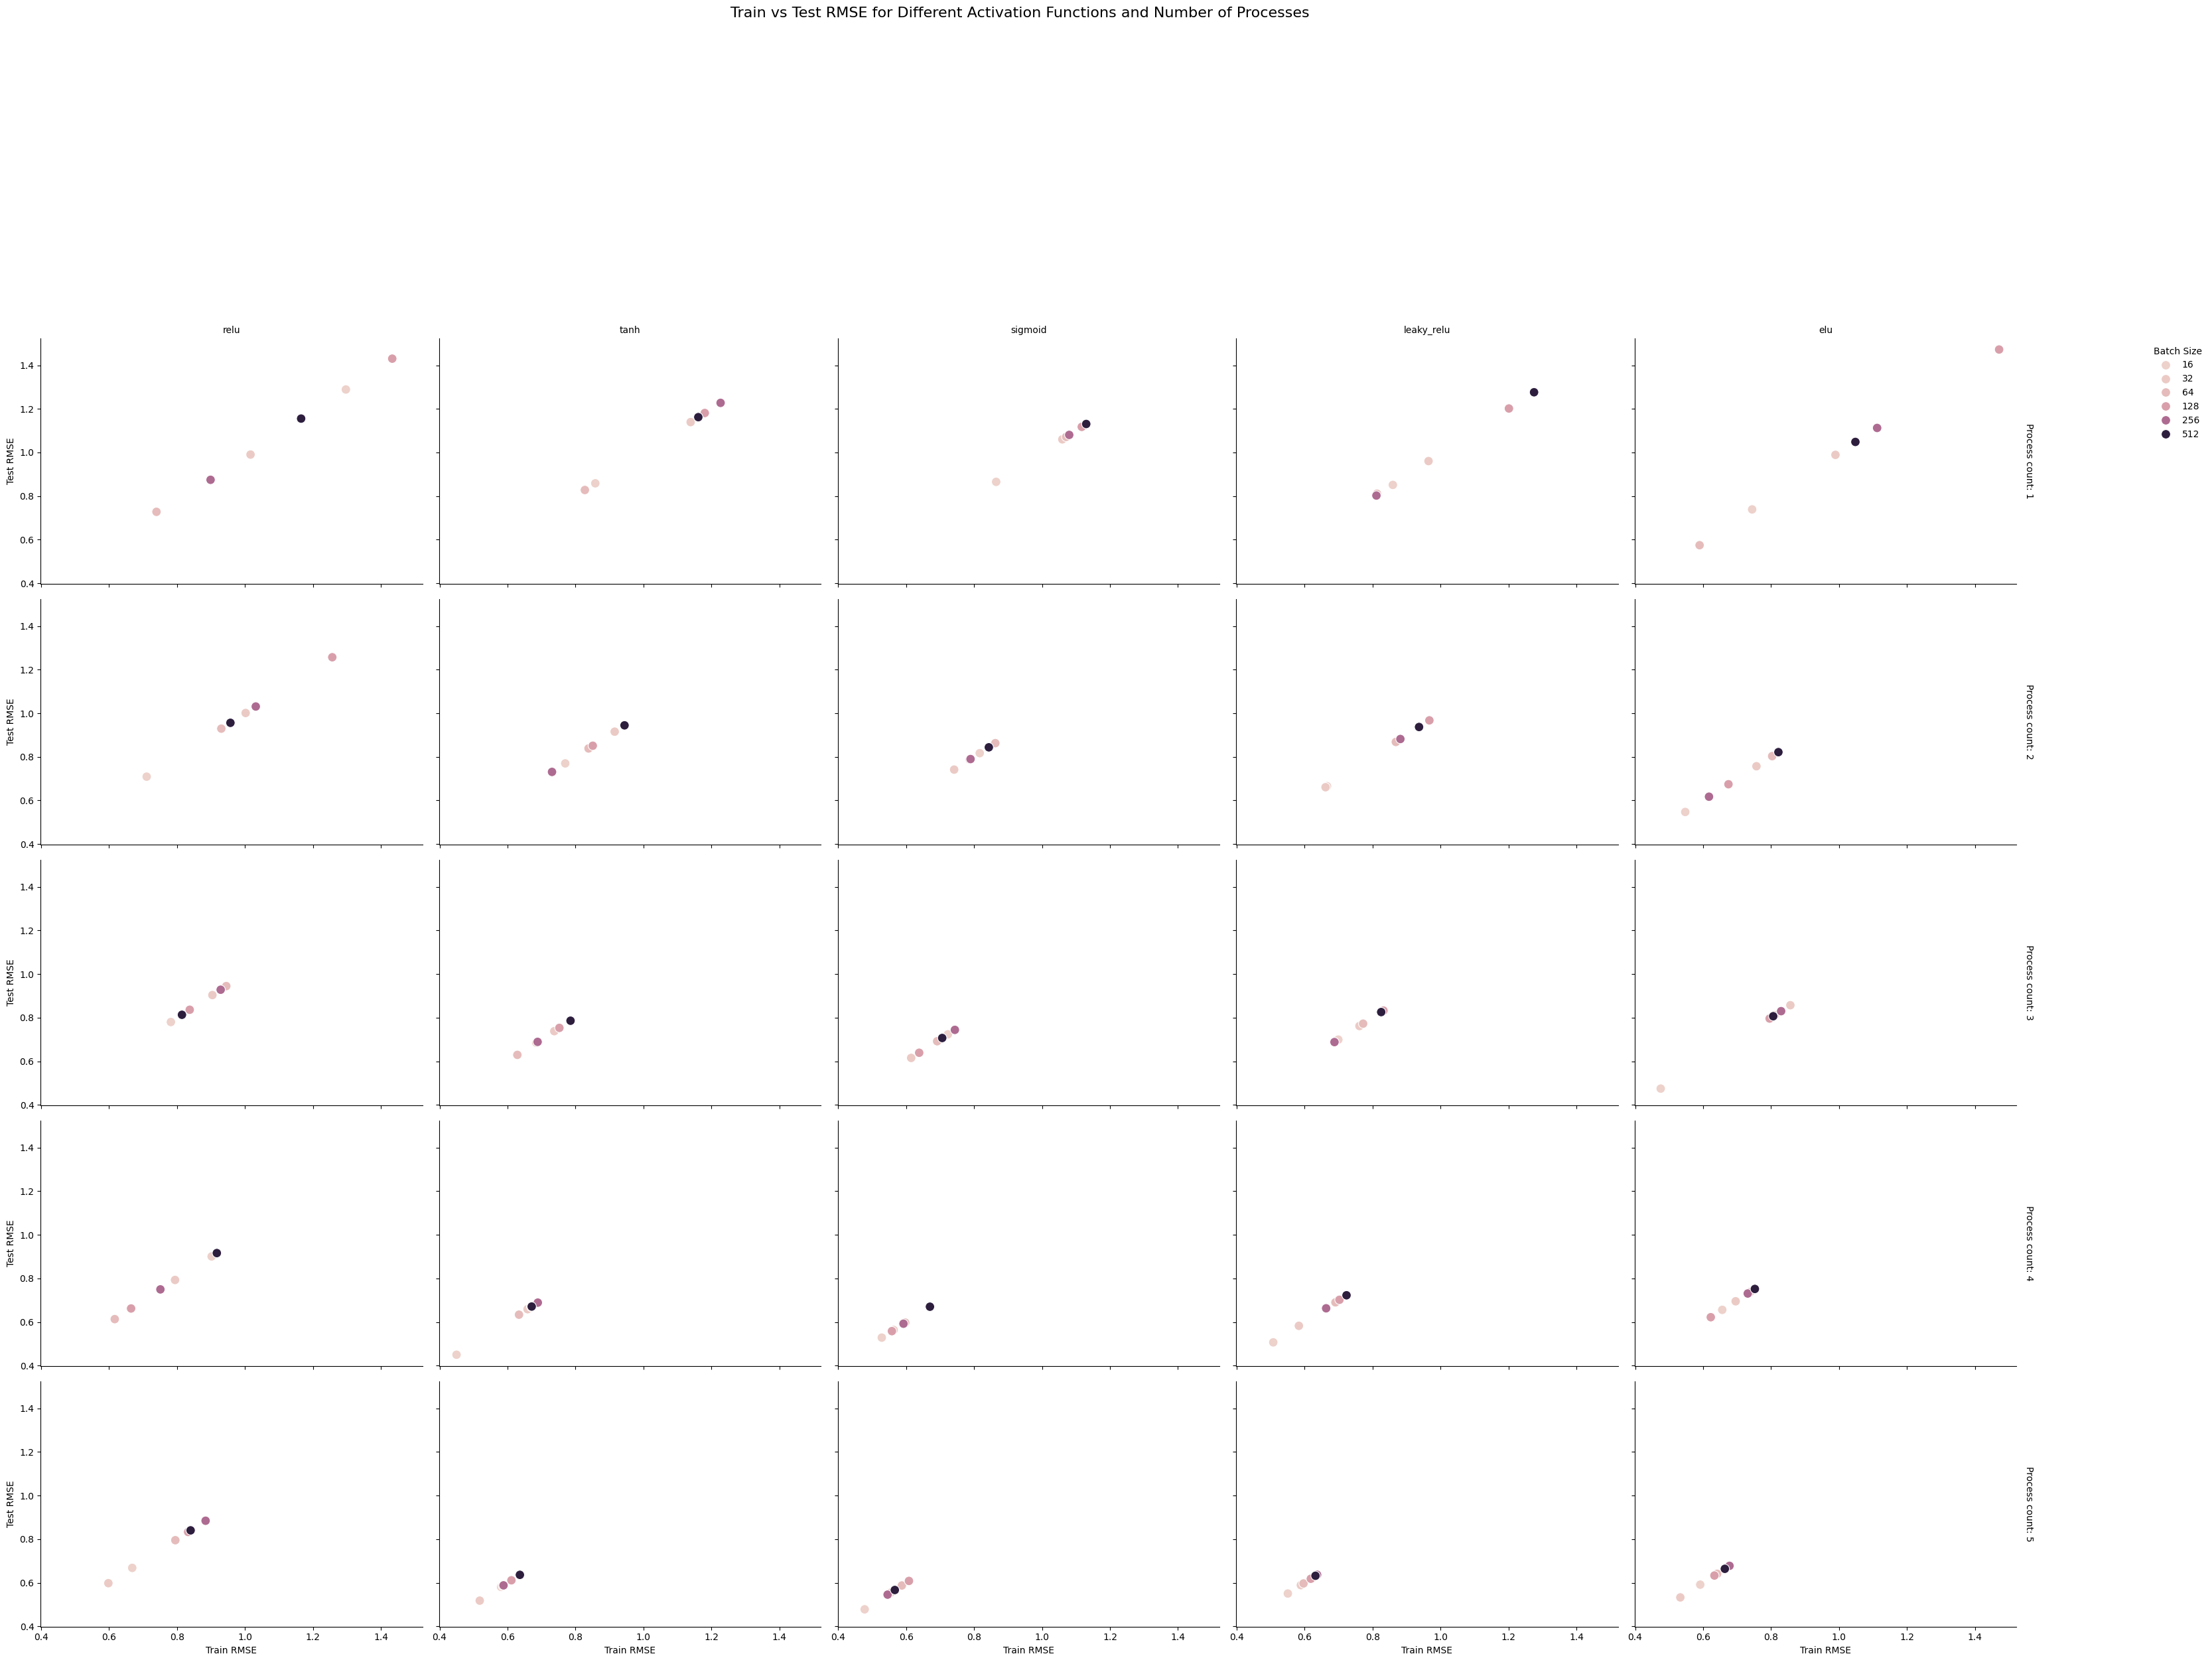

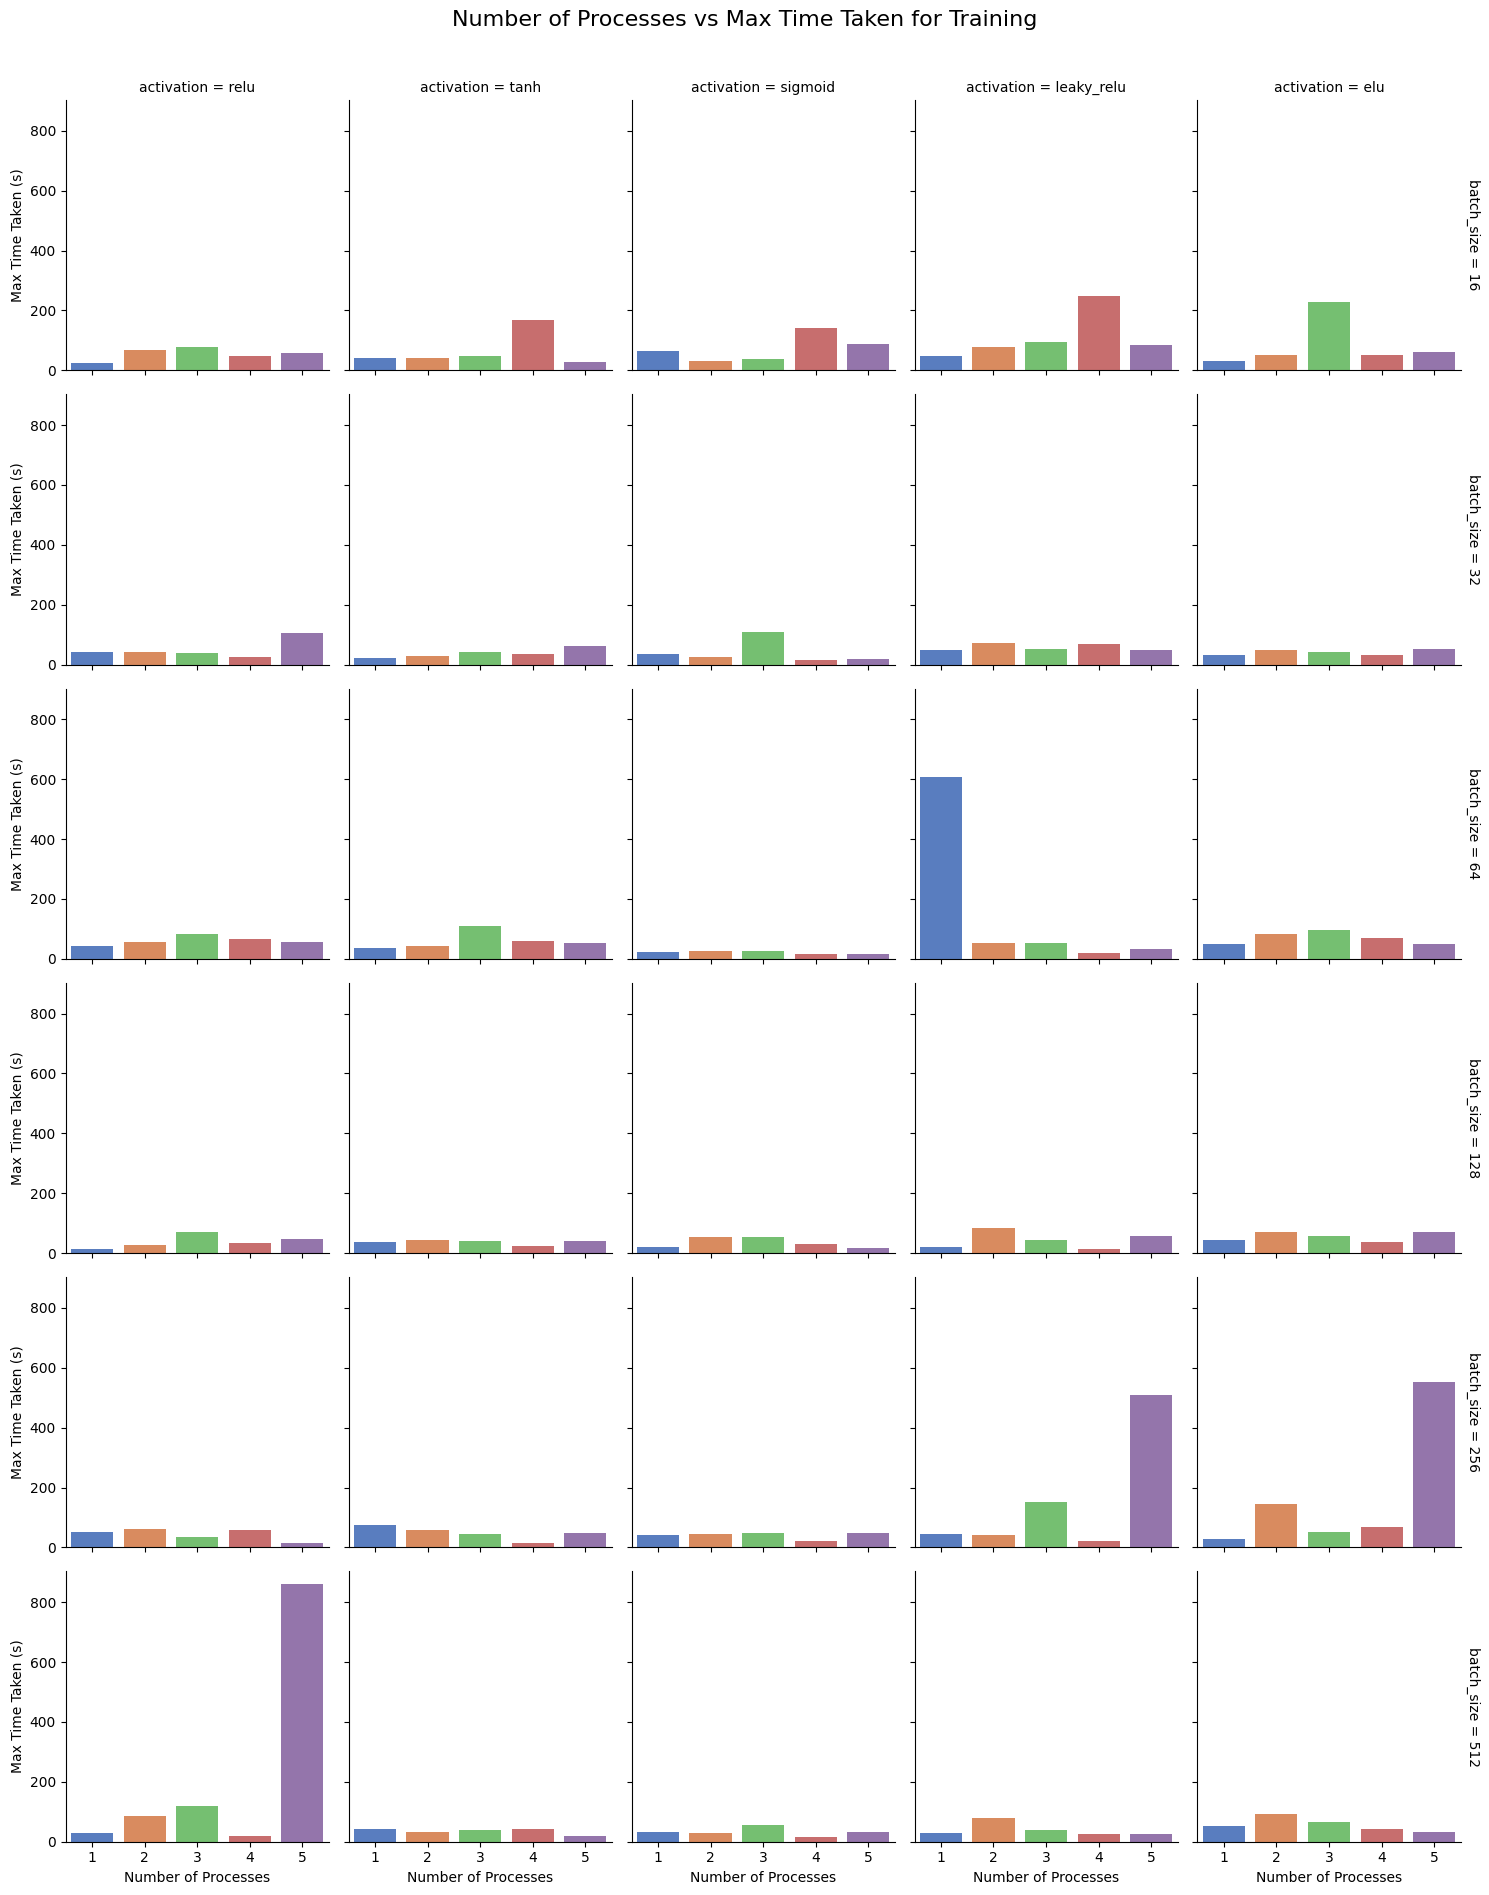

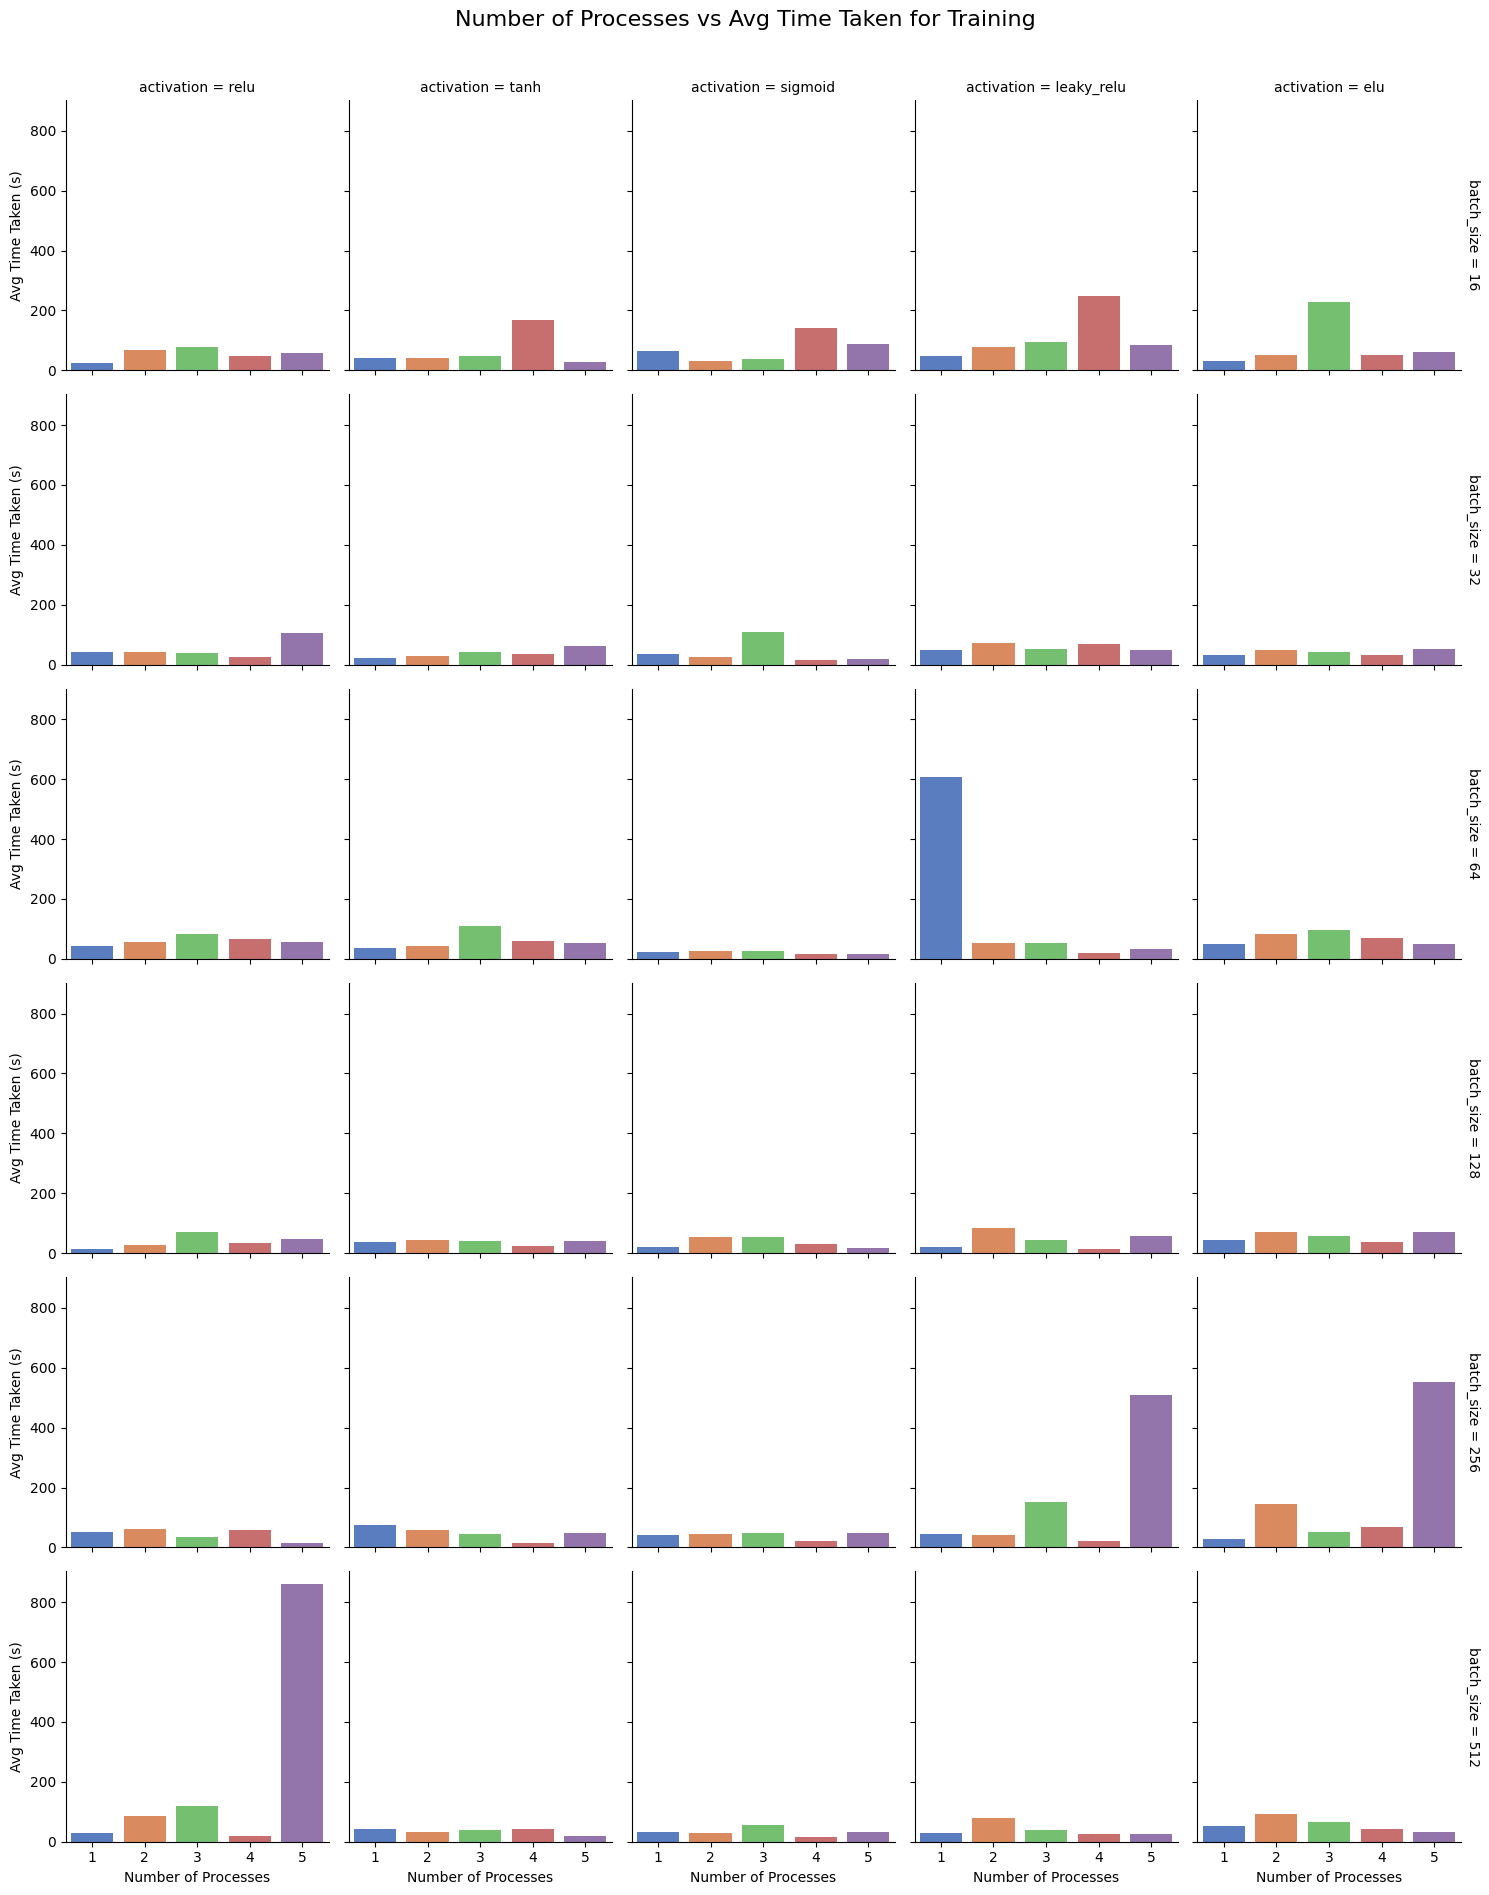

KeyboardInterrupt: 

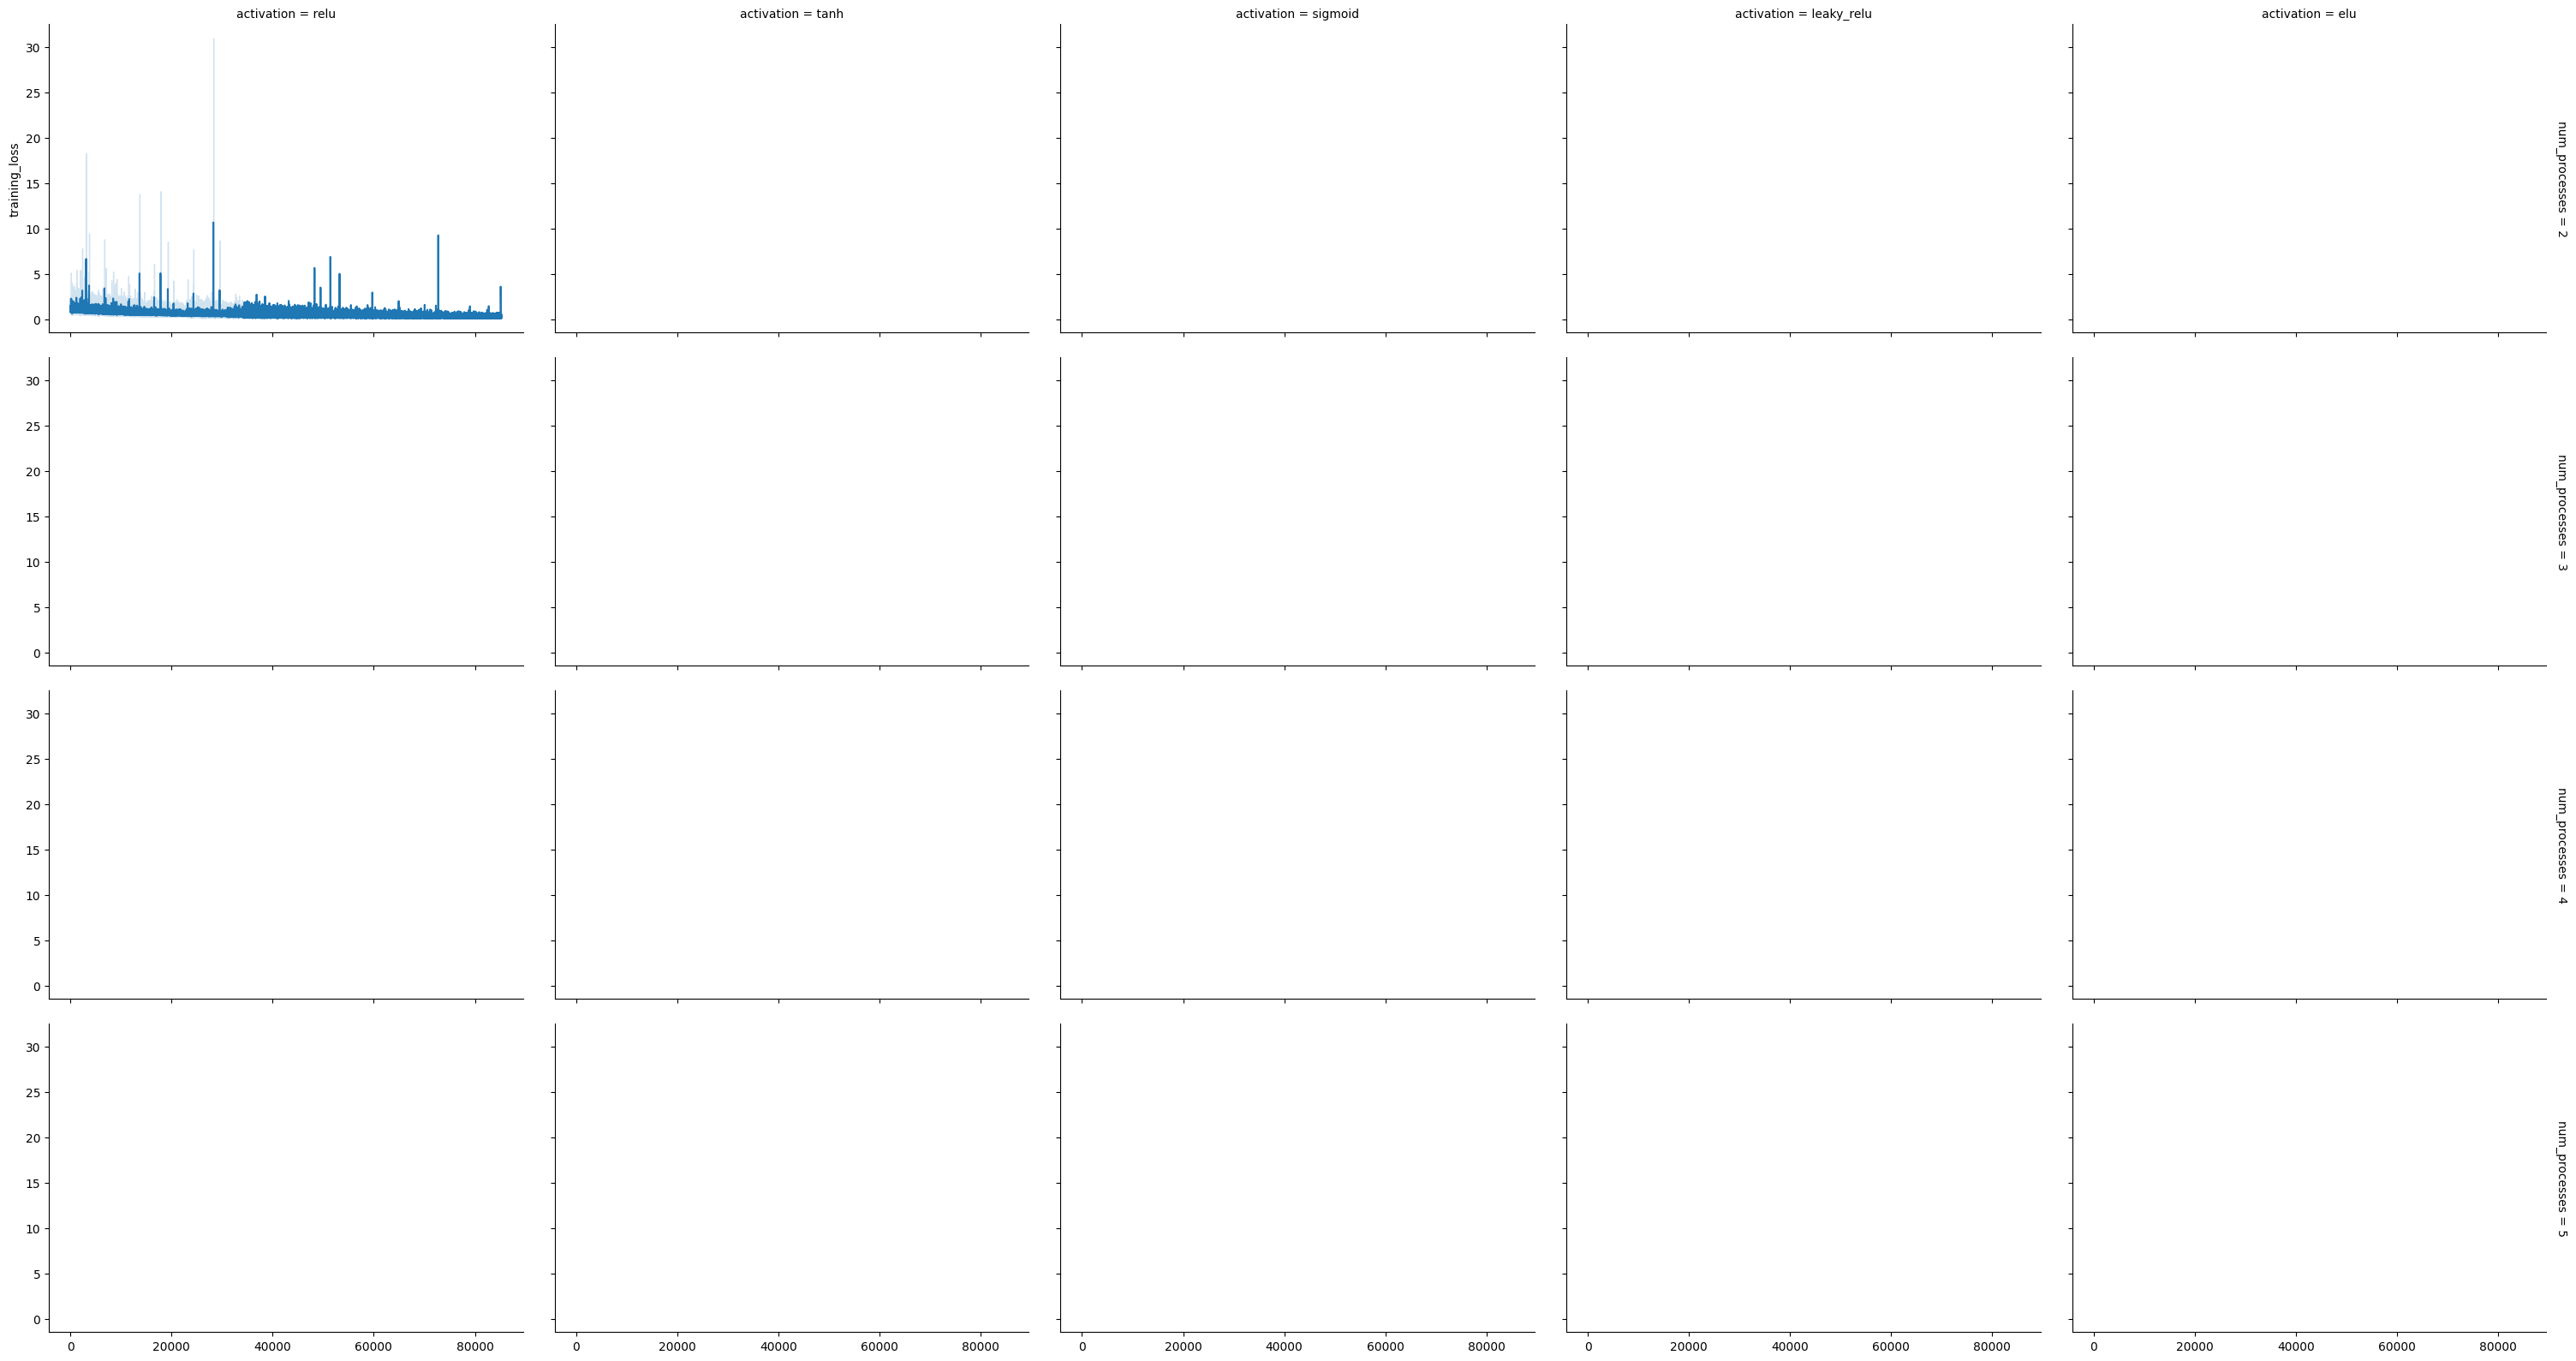

In [ ]:
# I want to create all the above plots for three different sets of data
# 1. constant learning rate - data is under logs/normalization_fix/new
# 2. cyclic without size factor - data is under logs/normalization_fix/cyclic_without_size_factor
# 3. cyclic with size factor - data is under logs/normalization_fix/cyclic_with_size_factor

# I will create a function that takes in the path to the data and the path to save the plots
# and creates all the above plots

def create_plots(data_path, save_path, prefix):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # import the test_train_rsme data
    data = pd.read_csv(f'{data_path}/train_test_rmse.csv', header=0)

    # plot test vs train rmse for different models
    g = sns.FacetGrid(data, col='activation', row='num_processes', margin_titles=True, height=4, aspect=1.5)
    g.map_dataframe(sns.scatterplot, x='train_rmse', y='test_rmse', hue='batch_size', s=100)
    g.set_axis_labels("Train RMSE", "Test RMSE")
    g.set_titles(col_template="{col_name}", row_template="Process count: {row_name}")
    # all legend outside the plot
    g.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Batch Size')
    plt.tight_layout()
    g.fig.suptitle(f'{prefix} Train vs Test RMSE for Different Activation Functions and Number of Processes', fontsize=16, y=1.25)
    # add a title for the entire plot below the subplots, space the title from the subplots
    plt.subplots_adjust(top=1)
    plt.savefig(f'{save_path}/train_test_rmse.png', bbox_inches='tight')
    plt.show()

    # plot a bar chart between number of processes and max time taken for training
    g = sns.FacetGrid(data, col="activation", row="batch_size", margin_titles=True)
    g.map_dataframe(sns.barplot, x='num_processes', y='train_time_max', palette='muted', hue ='num_processes', dodge=False)
    g.set_axis_labels("Number of Processes", "Max Time Taken (s)")
    plt.tight_layout()
    g.fig.suptitle(f'{prefix} Number of Processes vs Max Time Taken for Training', fontsize=16, y=1.05)
    # add a title for the entire plot below the subplots, space the title from the subplots
    plt.subplots_adjust(top=1)
    plt.savefig(f'{save_path}/process_train_time_max.png', bbox_inches='tight')
    plt.show()

    # plot a bar chart between number of processes and avg time taken for training
    g = sns.FacetGrid(data, col="activation", row="batch_size", margin_titles=True)
    g.map_dataframe(sns.barplot, x='num_processes', y='train_time_avg', palette='muted', hue ='num_processes', dodge=False)
    g.set_axis_labels("Number of Processes", "Avg Time Taken (s)")
    plt.tight_layout()
    g.fig.suptitle(f'{prefix} 'Number of Processes vs Avg Time Taken for Training', fontsize=16, y=1.05)
    # add a title for the entire plot below the subplots, space the title from the subplots
    plt.subplots_adjust(top=1)
    plt.savefig(f'{save_path}/process_train_time_avg.png', bbox_inches='tight')
    plt.show()

    # import the training metrics data
    training_metrics_data = pd.read_csv(f'{data_path}/training_metrics.csv', header=0)
    # extend the previous plot to include all activation functions and process counts 
    g = sns.FacetGrid(training_metrics_data[training_metrics_data['num_processes'] > 1], col='activation', row='num_processes', margin_titles=True, height=4, aspect=1.5)
    g.map_dataframe(sns.lineplot, x='iteration', y='training_loss')
    g.set_axis_labels("iteration", "Train Loss")
    g.set_titles(col_template="{col_name}", row_template="Process count: {row_name}")
    g.fig.suptitle(f'{prefix} Number of Processes vs Train Loss over Iterations', fontsize=16, y=1.25)
    # add a title for the entire plot below the subplots, space the title from the subplots
    plt.subplots_adjust(top=1)
    plt.savefig(f'{save_path}/train_loss_over_iterations.png', bbox_inches='tight')
    plt.show()  

# create plots for constant learning rate
create_plots('../../logs/normalization_fix/new', '../../logs/normalization_fix/constant_lr', 'Constant Learning Rate')
# create plots for cyclic without size factor
create_plots('../../logs/normalization_fix/cyclic_without_size_factor', '../../logs/normalization_fix/cyclic_without_size_factor', 'Cyclical Learning Rate')
# create plots for cyclic with size factor
create_plots('../../logs/normalization_fix/cyclic_with_size_factor', '../../logs/normalization_fix/cyclic_with_size_factor', 'Hybrid Learning Rate')